# Exploratory Data Analysis of Show Reviews

In this notebook I'm going to explore the reviews' dataset.

## Imports

In [40]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

In [28]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
SEED = 42

## Paths

In [3]:
relative_path = os.path.join("../../../", "data")
cleaned_reviews_path = os.path.join(relative_path, "2_cleaned_reviews")

## Data

### Loading data

In [8]:
reviews = pd.read_parquet(os.path.join(cleaned_reviews_path, "reviews.parquet"))
reviews.shape

(206737, 9)

### Dataset overview

In [6]:
reviews.sample(n=10, random_state=SEED)

,show_id,user_id,type,datetime,sentiment,subtitle,review,review_score,score
196236,257386,28525,series,2010-08-27 11:23:00,positive,Вечный город.,К истории Древнего мира у меня отношение особо...,40,NaN
128582,688832,44953,movie,2015-02-20 23:19:00,negative,50 оттенков разочарования,"Говорю сразу, книги читала все, да и по нескол...",5,3.0
159673,349,33910,movie,2018-04-15 21:04:00,positive,"Господи, спасибо, что не пронесло мимо","Есть два типа фильмов, мой друг. Одни ты прост...",4,NaN
109244,686898,44065,movie,2019-11-09 11:58:00,neutral,Что же стало с клоуном?,"Итак, в первую очередь хотелось бы отметить то...",2,6.5
92610,61455,66782,movie,2017-11-27 18:52:00,positive,Они отказываются подчиняться,"Автора этого замечательного фильма, Джосса Уэд...",5,NaN
43727,491724,44563,movie,2012-01-28 23:18:00,positive,Жестокая правда,"Финчер снова нас поразил, он всегда нас поража...",7,10.0
50195,102130,67145,movie,2009-08-17 11:56:00,positive,"Преодолеть 2 года жизни, что встретиться","Слышал о фильме много, и в основном положитель...",11,10.0
43651,491724,66283,movie,2012-02-19 15:33:00,negative,"Мужчины, которые ненавидели женщин.",Я попробовала рассматривать этот фильм с двух ...,3,6.0
48775,7226,7905,movie,2014-02-20 03:44:00,positive,None,"«Догвилль» - это один из тех редких фильмов, п...",3,10.0
75262,458,33255,movie,2013-06-22 21:14:00,positive,Тайна закрытой двери,Я имела счастье смотреть этот мультфильм в кин...,6,10.0


## EDA

### Descriptive statistics

In [17]:
reviews.shape[0]

206737

Overall, users left `206 737` reviews.  

In [10]:
reviews[["show_id", "user_id"]].nunique()

show_id     1862
user_id    69172
dtype: int64

The number of unique users that left reviews is `69172`. While the number of unique shows (movies/series) is `1862`.

`171 094` reviews were left for movies, which is approximately `83%`.

In [15]:
reviews["type"].value_counts()

movie     171094
series     35643
Name: type, dtype: int64

### Users

Let's look at the activity of the users

In [55]:
number_of_reviews_per_user = pd.DataFrame(reviews["user_id"].value_counts()).rename(
    columns={"user_id": "reviews_per_user"}
)

In [58]:
number_of_reviews_per_user.describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999])

,reviews_per_user
count,69172.000000
mean,2.988738
std,9.163423
min,1.000000
1%,1.000000
10%,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
90%,5.000000


As we can see, on average, users leave 3 reviews, but the median value is equal to 1 review.  
It means that we have a lot of outliers - people, who leave enormous amounts of reviews.

In [45]:
number_of_reviews_per_user["log_reviews_per_user"] = np.log1p(
    number_of_reviews_per_user["reviews_per_user"]
)

In [57]:
number_of_reviews_per_user["reviews_per_user"].value_counts()

1      43073
2      10761
3       4867
4       2656
5       1593
       ...  
151        1
153        1
154        1
163        1
544        1
Name: reviews_per_user, Length: 177, dtype: int64

<AxesSubplot:xlabel='reviews_per_user', ylabel='Count'>

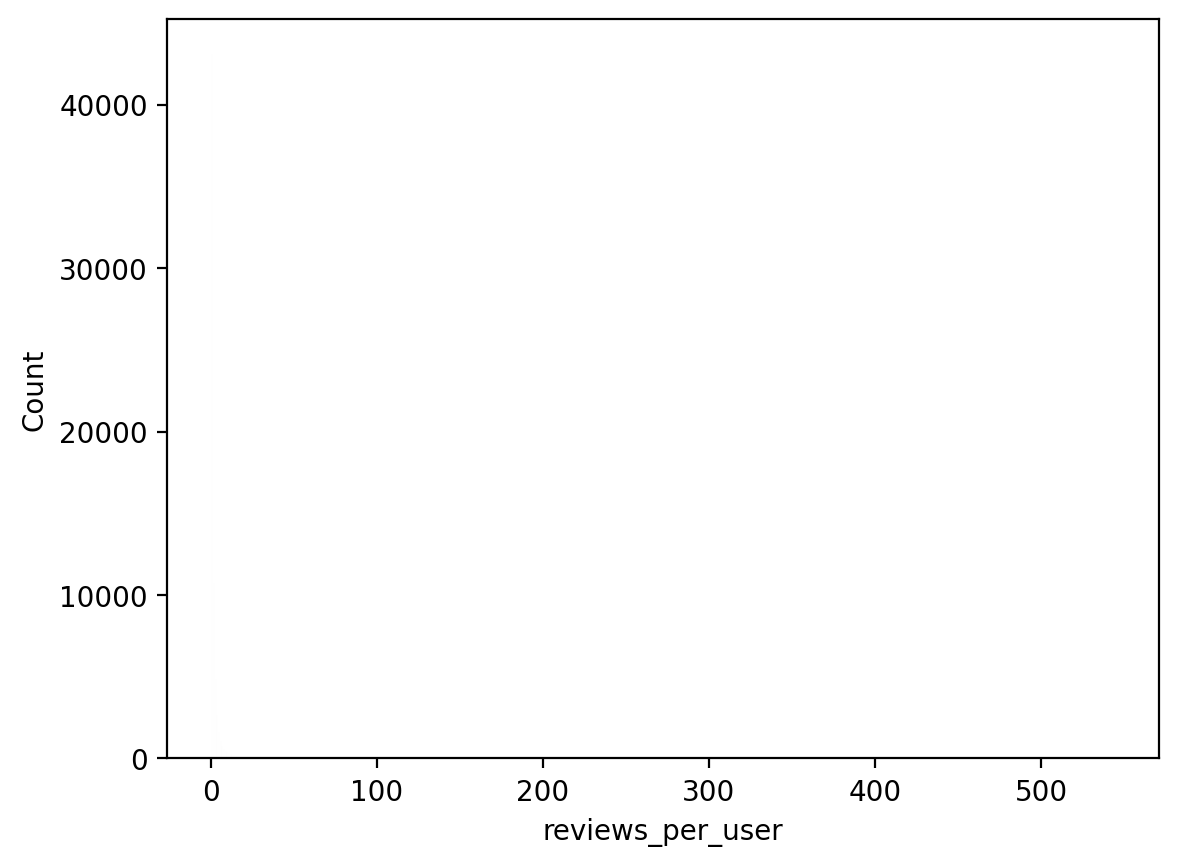

In [44]:
sns.histplot(data=number_of_reviews_per_user, x="reviews_per_user")